# Unit 5 - Financial Planning

In [129]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import pandas_market_calendars as mcal
import numpy as np
import matplotlib.pyplot as plt 
import time
from random import random
%matplotlib inline

In [130]:
# Load .env enviroment variables
load_dotenv()



True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [131]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [132]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [133]:
# Fetch current BTC price
import json
btc_info = requests.get(btc_url).json()

# Fetch current ETH price
eth_info = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_info['data']['1']['quotes']['CAD']['price']
my_eth_value = eth_info['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $25994.34
The current value of your 5.3 ETH is $1407.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [134]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [135]:
# Set Alpaca API key and secret
alpaca_api_key=os.getenv('ALPACA_API_KEY')
alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key, api_version='v2')
#def check_date_time(date)
#    last_trading_day = date
#    nyse = mcal.get_calendar('NYSE')
#    holidays = nyse.holidays()
#    if last_trading_day.time  
#    while ((last_trading_day.weekday() in [5,6]) or (last_trading_day in holidays.holidays)):
#        last_trading_day = last_trading_day - dt.timedelta(days = 1) 
def get_tickers_data(tickers, start_date, end_date, timeframe):
    # Format current date as ISO format
    start_date = pd.Timestamp(start_date, tz = "America/New_York").isoformat()
    end_date = pd.Timestamp(end_date, tz = "America/New_York").isoformat()
    # Get current closing prices for SPY and AGG
    tickers_data_df = alpaca.get_bars(tickers, timeframe,start_date , end_date, adjustment = 'raw').df
    tickers_data_df.index = tickers_data_df.index.date
    tickers_data_df= tickers_data_df[['symbol', 'close']]
    tickers_data_list=[]
    for ticker in tickers:
        # Reorganize the DataFrame
        # Separate ticker data
        tickers_data_list.append(tickers_data_df[tickers_data_df['symbol']==ticker].drop('symbol', axis=1))
    # Concatenate the ticker DataFrames    
    clean_tickers_data = pd.concat(tickers_data_list,axis=1, keys=tickers)
    return clean_tickers_data


In [136]:
 #not allowed access to current time
last_trading_day = dt.datetime.today()
#nyse = mcal.get_calendar('NYSE')
#holidays = nyse.holidays()
while (not np.is_busday(last_trading_day.date())): 
    last_trading_day = last_trading_day - dt.timedelta(days = 1) 
#while ((last_trading_day.weekday() in [5,6]) or (last_trading_day in holidays.holidays)):
#    last_trading_day = last_trading_day - dt.timedelta(days = 1) 
if (last_trading_day.time().hour)> 16:
    last_trading_day= last_trading_day.replace(hour=15, minute=30) 
else:
    last_trading_day = last_trading_day-dt.timedelta(minutes = 30)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Min"

tickers_data = get_tickers_data(tickers, last_trading_day, last_trading_day+dt.timedelta(minutes = 1), timeframe)

# Get current closing prices for SPY and AGG


# Preview DataFrame



In [137]:
tickers_data

,AGG,SPY
,close,close
2022-07-12,102.15,384.0271


In [138]:
# Pick AGG and SPY close prices
agg_close_price = tickers_data['AGG']['close'].values[0]
spy_close_price = tickers_data['SPY']['close'].values[0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.15
Current SPY closing price: $384.0271


In [139]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19201.35
The current value of your 200 AGG shares is $20430.00


### Savings Health Analysis

In [140]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# Create savings DataFrame

amounts = {"amount": [(my_btc_value+my_eth_value), (my_spy_value+my_agg_value)]}
type = ['crypto', 'shares']
df_savings = pd.DataFrame(amounts, index = type)


# Display savings DataFrame
display(df_savings)

,amount
crypto,27401.5665
shares,39631.3550


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

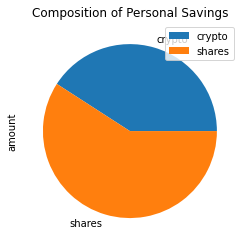

In [141]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [142]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().values[0]

# Validate saving health
if (total_savings> emergency_fund):
    print('Congratulations! You have enough money in your emergency fund.')
elif (total_savings == emergency_fund):
    print('Congratulations! You have reached your financial goal.')
else:
    print(f'You are ${emergency_fund-total_savings} away from your financial goal')
    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [143]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-01', tz='America/New_York').isoformat()

In [144]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = '1Day'
df_stock_data = get_tickers_data(tickers, start_date, end_date, timeframe)

df_stock_data.head()

,AGG,SPY
,close,close
2017-05-01,108.73,238.68
2017-05-02,108.88,238.77
2017-05-03,108.77,238.48
2017-05-04,108.68,238.76
2017-05-05,108.70,239.70


In [145]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

#function to calculate and print lower and upper 
#`95%` confidence intervals to calculate the range of the possible outcomes of given an 
#intial investment
def ci_lower_upper(tbl, investment):
    ci_lower = round(tbl[8]*investment,2)
    ci_upper = round(tbl[9]*investment,2)

    # Print results
    print(f"There is a 95% chance that an initial investment of ${investment} in the portfolio"
          f" over the next 30 years will end within in the range of"
          f" ${ci_lower} and ${ci_upper}")
    return
#fucntion to run the monte carlo simulations and plot statistical values 
def cal_retirement(weights, years,df_stock_data,num_simulation ):
    MC_even_dist = MCSimulation(df_stock_data, 
                            weights, num_simulation,
                            num_trading_days = 252*years)


# Printing the simulation input data
    MC_even_dist.portfolio_data.head()

# Running a Monte Carlo simulation to forecast 30 years cumulative returns
    MC_even_dist.calc_cumulative_return()

# Plot simulation outcomes
    plt.figure()
    line_plot = MC_even_dist.plot_simulation()

# Plot probability distribution and confidence intervals
    plt.figure()
    dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

# Fetch summary statistics from the Monte Carlo simulation results
    even_tbl = MC_even_dist.summarize_cumulative_return()
    

    return even_tbl
### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.
    

    

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\amany\Documents\Fintech class\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<Figure size 432x288 with 0 Axes>

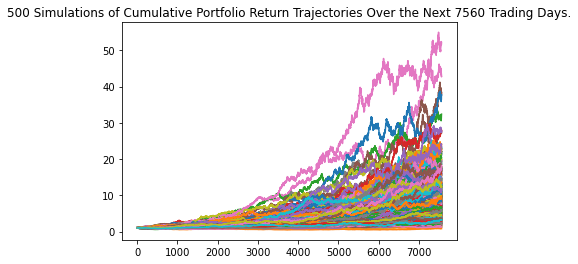

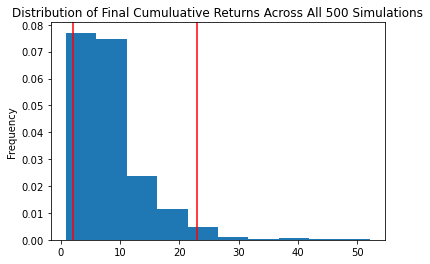

In [146]:
# Set initial values for simulations
weights = [0.4, 0.6]
years = 30 
num_simulation = 500
thirty_years_tbl = cal_retirement(weights,years,df_stock_data,num_simulation )
# Print summary statistics

In [147]:
# Print summary statistics
print(thirty_years_tbl)
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_upper(thirty_years_tbl,initial_investment)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_upper(thirty_years_tbl,initial_investment)

count           500.000000
mean              8.488330
std               6.008272
min               0.801862
25%               4.410755
50%               7.076561
75%              10.587336
max              52.200980
95% CI Lower      1.999530
95% CI Upper     22.993987
Name: 7560, dtype: float64
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39990.6 and $459879.73
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $59985.9 and $689819.6


## Optional Challenge - Early Retirement


### Five Years Retirement Option

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\amany\Documents\Fintech class\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<Figure size 432x288 with 0 Axes>

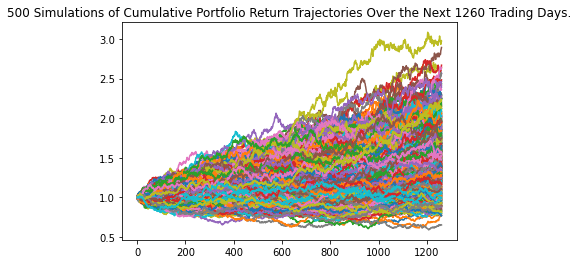

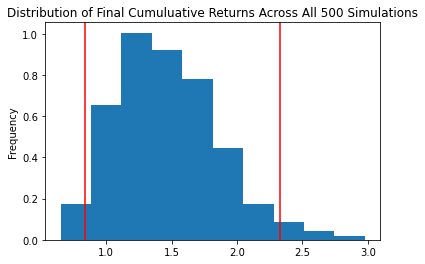

In [148]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set initial values for simulations
weights = [0.4, 0.6]
years = 5 
num_simulation = 500
five_years_tbl = cal_retirement(weights,years,df_stock_data,num_simulation )

In [149]:
# Print summary statistics
print(five_years_tbl)
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_upper(five_years_tbl,initial_investment)

count           500.000000
mean              1.465852
std               0.387871
min               0.649965
25%               1.201737
50%               1.417249
75%               1.689094
max               2.976940
95% CI Lower      0.838048
95% CI Upper      2.329213
Name: 1260, dtype: float64
There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $50282.87 and $139752.79


### Ten Years Retirement Option

In [151]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
#weights = [0.4, 0.6]
years = 10 
num_simulation = 500

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\amany\Documents\Fintech class\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<Figure size 432x288 with 0 Axes>

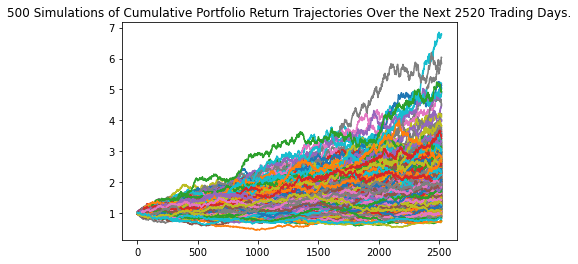

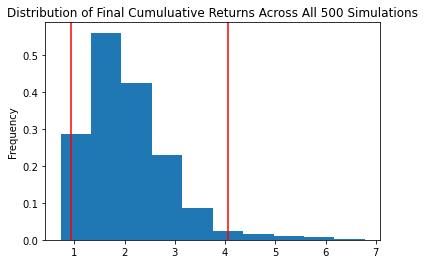

In [152]:
ten_years_tbl = cal_retirement(weights,years,df_stock_data,num_simulation )

# Print summary statistics
print(ten_years_tbl)
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_upper(ten_years_tbl,initial_investment)